# Loss curve

In [1]:
import matplotlib.pyplot as plt
import json

In [3]:
path = "open-unmix-pytorch/scripts/open-unmix/vocals.json"

with open(path) as f:
    data = json.load(f)

train_loss = data["train_loss_history"]
valid_loss = data["valid_loss_history"]
train_time = data["train_time_history"]

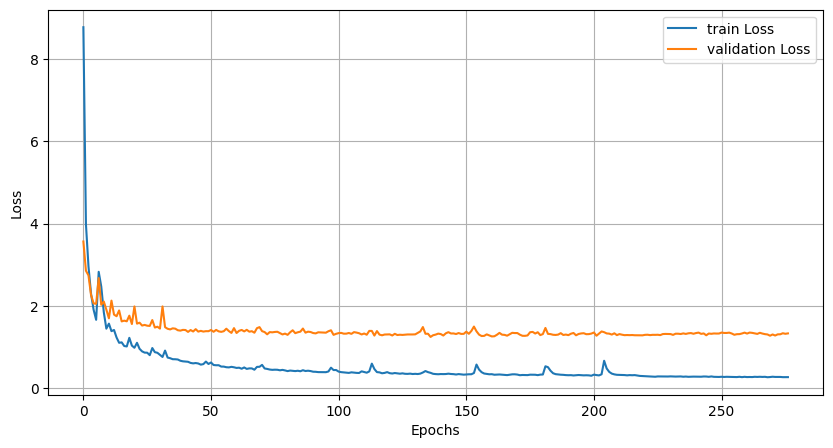

In [4]:
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label="train Loss")
plt.plot(valid_loss, label="validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
# plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
total_time = sum(train_time)
print(f"Total training time: {(total_time/3600):.2f} hours")
print(f"Average training time per epoch: {(total_time/len(train_time)):.2f} seconds")

Total training time: 7.72 hours
Average training time per epoch: 100.74 minutes


# Source Separation Results

In [13]:
import librosa
import matplotlib.pyplot as plt
import numpy as np

In [20]:
track_name = "PR - Happy Daze"
epoch = 137

mixture_path = (
    f"/home/ndrw1221/nas/datasets/musdb18hq-dataset/test/{track_name}/mixture.wav"
)
target_path = (
    f"/home/ndrw1221/nas/datasets/musdb18hq-dataset/test/{track_name}/vocals.wav"
)
estimation_path = (
    f"open-unmix-pytorch/openunmix/results/epoch_{epoch}/{track_name}/vocals.wav"
)

In [21]:
mixture, sr = librosa.load(mixture_path)
target, sr = librosa.load(target_path)
estimation, sr = librosa.load(estimation_path)
mixture_mel = librosa.feature.melspectrogram(
    y=mixture, sr=sr, n_fft=4096, hop_length=1024
)
target_mel = librosa.feature.melspectrogram(
    y=target, sr=sr, n_fft=4096, hop_length=1024
)
estimation_mel = librosa.feature.melspectrogram(
    y=estimation, sr=sr, n_fft=4096, hop_length=1024
)

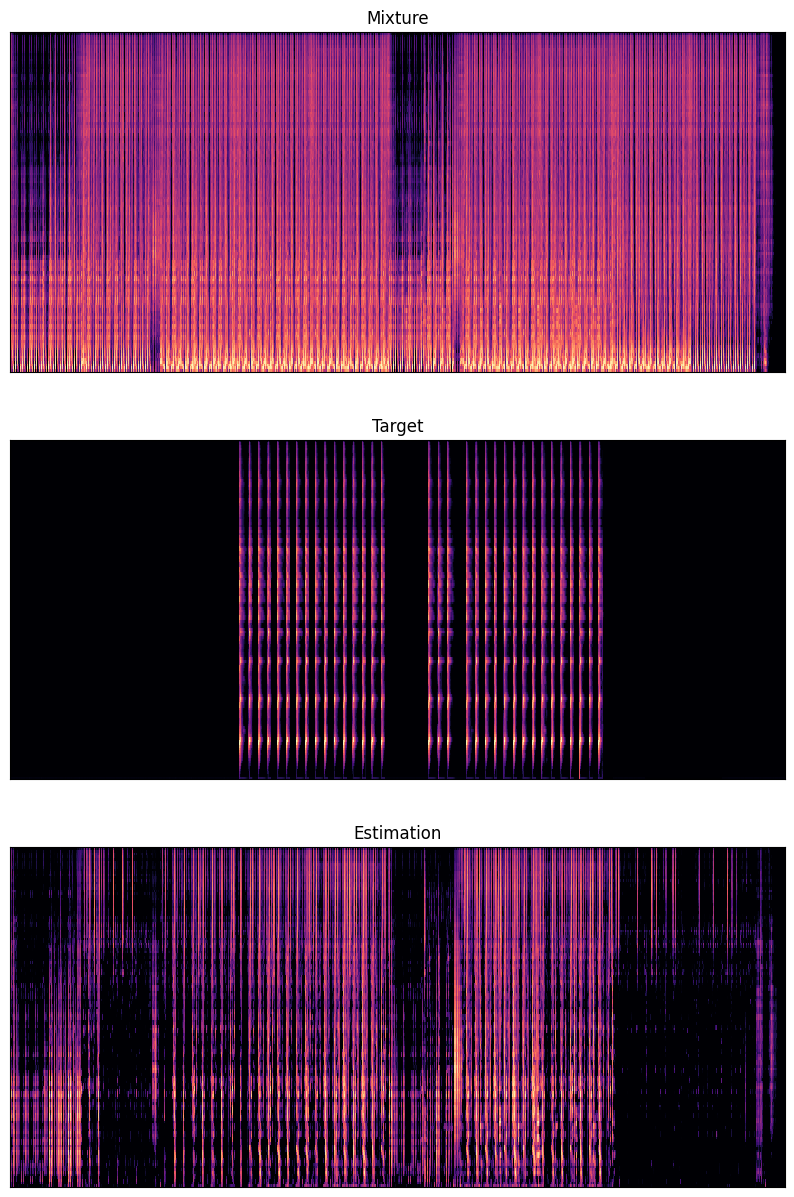

In [22]:
mels = [mixture_mel, target_mel, estimation_mel]
titles = ["Mixture", "Target", "Estimation"]
fig, axs = plt.subplots(3, 1, figsize=(10, 15))
for i, ax in enumerate(axs):
    librosa.display.specshow(librosa.power_to_db(mels[i], ref=np.max), ax=ax)
    ax.set_title(titles[i])

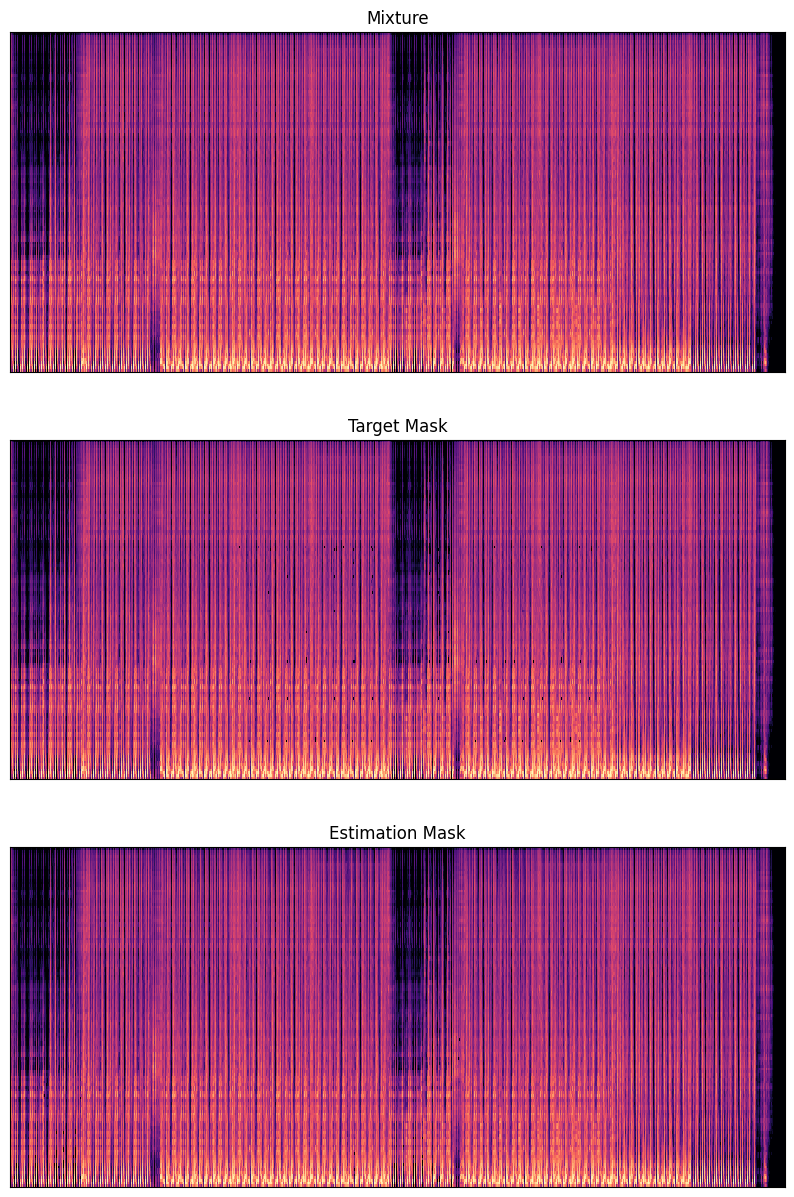

In [24]:
mels = [mixture_mel, mixture_mel - target_mel, mixture_mel - estimation_mel]
titles = ["Mixture", "Target Mask", "Estimation Mask"]
fig, axs = plt.subplots(3, 1, figsize=(10, 15))
for i, ax in enumerate(axs):
    librosa.display.specshow(librosa.power_to_db(mels[i], ref=np.max), ax=ax)
    ax.set_title(titles[i])